## Importing Required Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To give multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Loading Dataset

In [76]:
linear_df = pd.read_csv(r"C:\Task\demo_data\4.linearsep.csv",header = None)

### Insights of Dataset

In [77]:
linear_df.head()
linear_df.shape
linear_df.info()

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


(100, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


### Plotting Scatterplot to visualize the input and output

In [78]:
# for HD visualizations
%config InlineBackend.figure_format='retina'

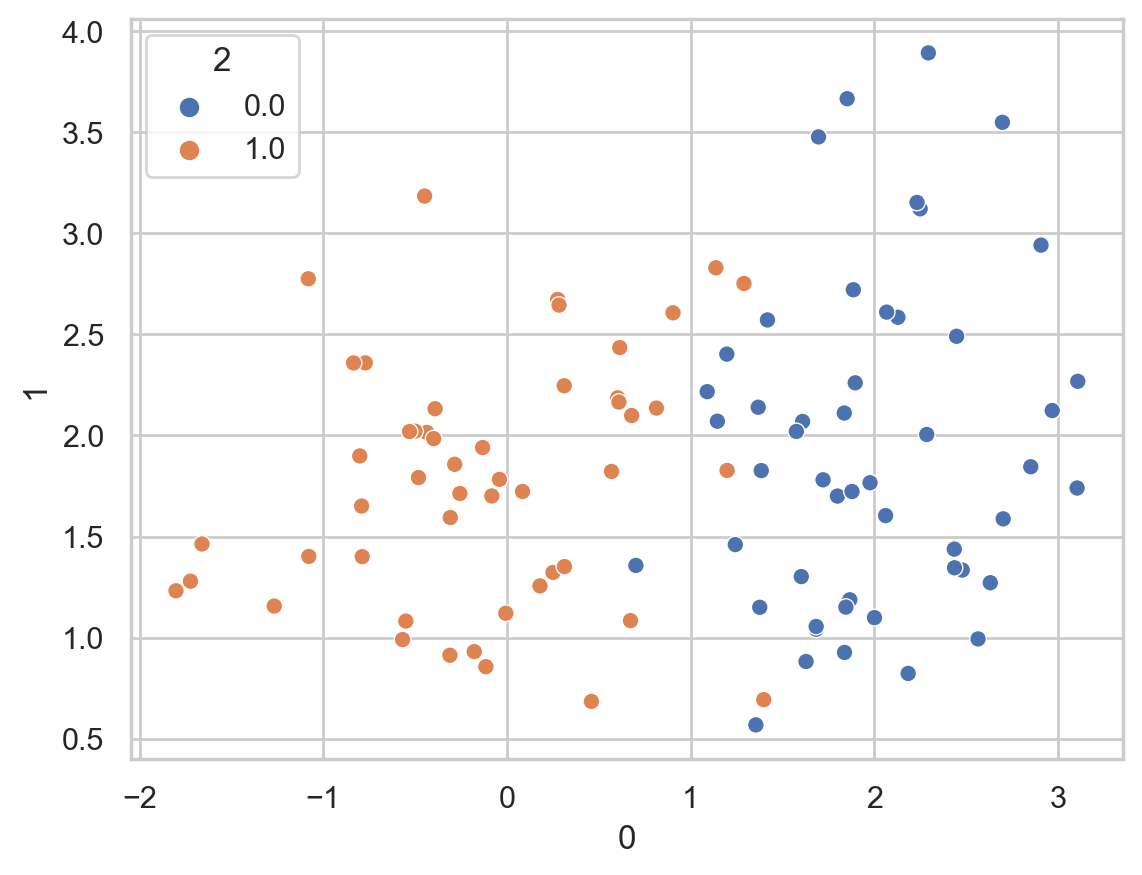

In [79]:
sns.set(style='whitegrid')
sns.scatterplot(x = linear_df[0],y = linear_df[1] ,hue = linear_df[2],data = linear_df);

### Train & test Split of the dataset

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(linear_df[[0,1]], linear_df[2], test_size = 0.2)

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
# Performing standardization 
scaler = StandardScaler()
X_trainf = scaler.fit_transform(X_train)
X_testf = scaler.transform(X_test)

## Building Model 

## 1st Round

In [84]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [141]:
model = Sequential()
model.add(Dense(8,activation = 'relu',kernel_initializer = 'he_normal',input_dim = 2)) # No.of Neurons
model.add(Dense(5,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(2,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [142]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 8)                 24        
                                                                 
 dense_72 (Dense)            (None, 5)                 45        
                                                                 
 dense_73 (Dense)            (None, 4)                 24        
                                                                 
 dense_74 (Dense)            (None, 2)                 10        
                                                                 
 dense_75 (Dense)            (None, 1)                 3         
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [143]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [144]:
history = model.fit(X_trainf,y_train,batch_size=10,epochs=311,validation_split=0.2)

Epoch 1/311


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


7/7 [==============================] - 2s 53ms/step - loss: 0.6891 - accuracy: 0.3594 - val_loss: 0.6808 - val_accuracy: 0.5625
Epoch 2/311
7/7 [==============================] - 0s 11ms/step - loss: 0.6858 - accuracy: 0.5625 - val_loss: 0.6798 - val_accuracy: 0.6250
Epoch 3/311
7/7 [==============================] - 0s 11ms/step - loss: 0.6843 - accuracy: 0.5781 - val_loss: 0.6795 - val_accuracy: 0.6250
Epoch 4/311
7/7 [==============================] - 0s 13ms/step - loss: 0.6828 - accuracy: 0.6094 - val_loss: 0.6790 - val_accuracy: 0.6250
Epoch 5/311
7/7 [==============================] - 0s 13ms/step - loss: 0.6814 - accuracy: 0.6094 - val_loss: 0.6780 - val_accuracy: 0.6250
Epoch 6/311
7/7 [==============================] - 0s 14ms/step - loss: 0.6805 - accuracy: 0.6094 - val_loss: 0.6776 - val_accuracy: 0.6250
Epoch 7/311
7/7 [==============================] - 0s 13ms/step - loss: 0.6790 - accuracy: 0.6094 - val_loss: 0.6762 - val_accuracy: 0.6250
Epoch 8/311
7/7 [===============

### Evaluation of Model

In [145]:
y_pred = model.predict(X_testf) 

1/1 [==============================] - 0s 139ms/step


In [146]:
y_capf = np.where(y_pred>0.5,1,0)

In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.95

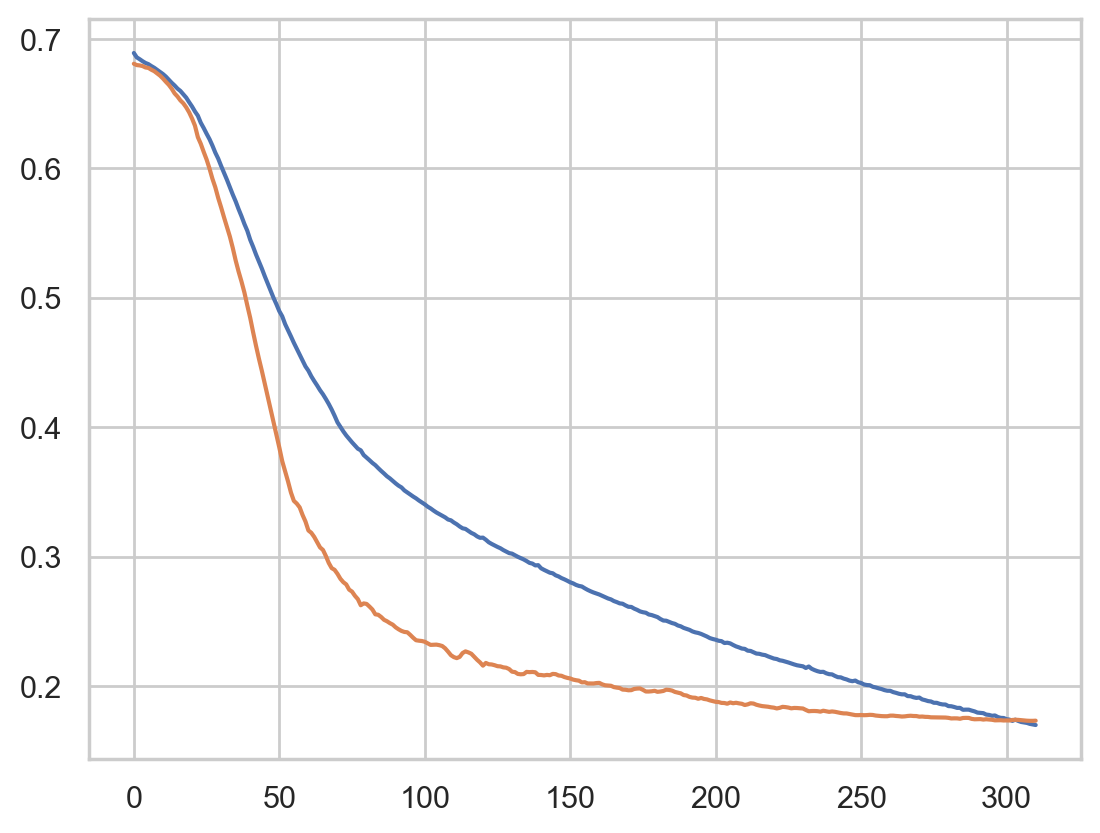

In [148]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

### Plotting Decision Regions

In [149]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 25s 3ms/step


<AxesSubplot: >

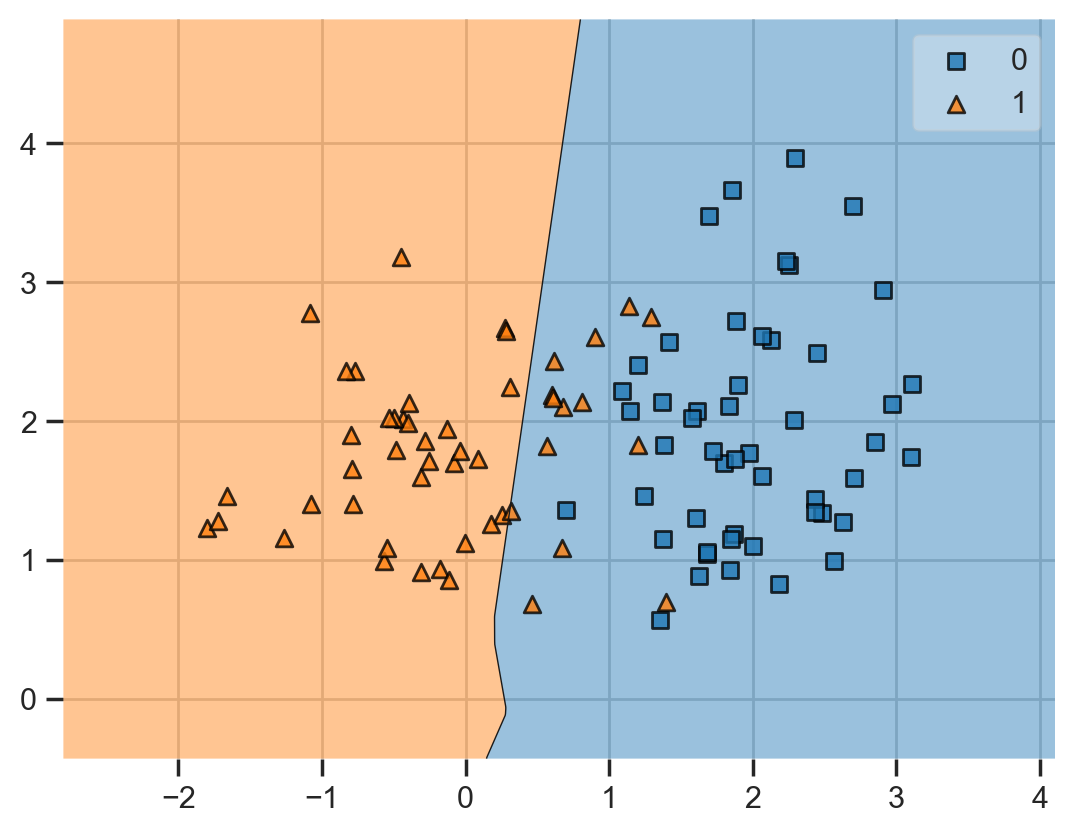

In [150]:
plot_decision_regions(linear_df[[0,1]].values, linear_df[2].values.astype(int), clf = model)

## 2nd Round

In [152]:
model = Sequential()
model.add(Dense(5,activation = 'relu',kernel_initializer = 'he_uniform',input_dim = 2)) # No.of Neurons
model.add(Dense(3,activation = 'relu',kernel_initializer = 'he_uniform'))
model.add(Dense(2,activation = 'relu',kernel_initializer = 'he_uniform'))

model.add(Dense(1,activation = 'sigmoid'))

In [153]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 5)                 15        
                                                                 
 dense_81 (Dense)            (None, 3)                 18        
                                                                 
 dense_82 (Dense)            (None, 2)                 8         
                                                                 
 dense_83 (Dense)            (None, 1)                 3         
                                                                 
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [154]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [155]:
history = model.fit(X_trainf,y_train,batch_size=10,epochs=311,validation_split=0.2)

Epoch 1/311


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


7/7 [==============================] - 2s 45ms/step - loss: 0.7862 - accuracy: 0.3438 - val_loss: 0.7654 - val_accuracy: 0.6250
Epoch 2/311
7/7 [==============================] - 0s 13ms/step - loss: 0.7718 - accuracy: 0.3438 - val_loss: 0.7521 - val_accuracy: 0.6250
Epoch 3/311
7/7 [==============================] - 0s 10ms/step - loss: 0.7606 - accuracy: 0.3125 - val_loss: 0.7391 - val_accuracy: 0.5625
Epoch 4/311
7/7 [==============================] - 0s 10ms/step - loss: 0.7486 - accuracy: 0.2969 - val_loss: 0.7278 - val_accuracy: 0.5625
Epoch 5/311
7/7 [==============================] - 0s 13ms/step - loss: 0.7384 - accuracy: 0.2969 - val_loss: 0.7175 - val_accuracy: 0.5625
Epoch 6/311
7/7 [==============================] - 0s 14ms/step - loss: 0.7293 - accuracy: 0.2969 - val_loss: 0.7068 - val_accuracy: 0.5625
Epoch 7/311
7/7 [==============================] - 0s 27ms/step - loss: 0.7202 - accuracy: 0.3125 - val_loss: 0.6964 - val_accuracy: 0.5625
Epoch 8/311
7/7 [===============

### Evaluation of Model

In [156]:
y_pred = model.predict(X_testf) 

1/1 [==============================] - 0s 132ms/step


In [157]:
y_capf = np.where(y_pred>0.5,1,0)

In [158]:
accuracy_score(y_test,y_capf)

0.95

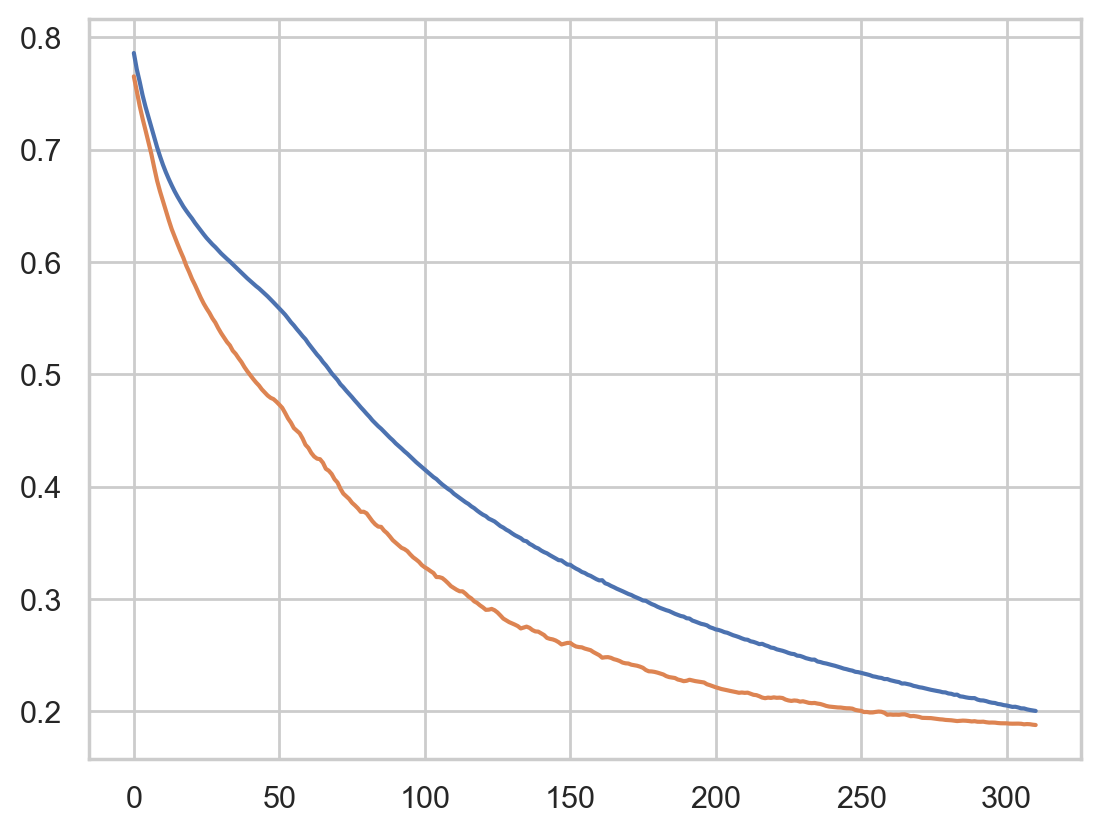

In [159]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

9600/9600 [==============================] - 32s 3ms/step


<AxesSubplot: >

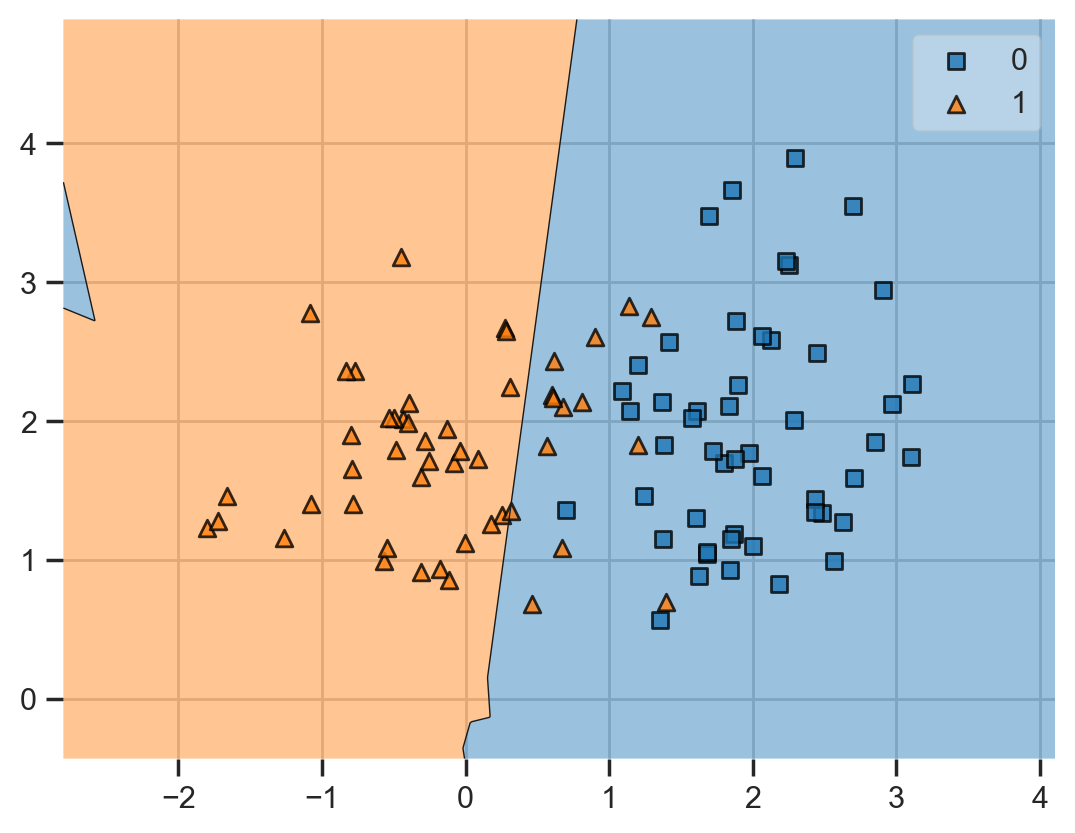

In [160]:
plot_decision_regions(linear_df[[0,1]].values, linear_df[2].values.astype(int), clf = model)